In [1]:
using Pkg

In [4]:
using MarketData, CSV, Plots, Random, LinearAlgebra, Statistics, DataFrames, SparseArrays

In [5]:
using TimeSeries

In [6]:
include("proxgrad.jl")

proxgrad_const

In [7]:
delta = CSV.read("delta2.csv");
delta_orig = CSV.read("delta.csv");
p_m = mean(delta_orig.Price)
p_s = std(delta_orig.Price)

8.676687440604942

In [8]:
using Dates

In [9]:
dates = Date(2020, 2, 11):Day(1):Date(2020, 10, 30)

Date("2020-02-11"):Day(1):Date("2020-10-30")

In [10]:
ta = TimeArray(dates, delta.Price);

In [11]:
ma_p = moving(mean,ta,5);

In [12]:
ma = values(ma_p)

259-element Array{Float64,1}:
 3.220202442640764
 3.2226061358132005
 3.2059521204317143
 3.196566316959716
 3.196894383070094
 3.196286260524027
 3.1849525919997212
 3.132182507464765
 3.058951750338322
 2.960296617060904
 2.787650045895617
 2.596793827183661
 2.415618680236024
 ⋮
 0.0932462578211554
 0.10799841742191237
 0.10868994139003677
 0.16020733392780578
 0.2180058933164232
 0.25177454437401503
 0.26255056206154215
 0.2724621857801396
 0.20308081974995762
 0.10281213054691671
 0.0519862839597238
 0.010322899134434245

In [13]:
m = append!([0.0],ma)
m = m[1:end-1]

259-element Array{Float64,1}:
 0.0
 3.220202442640764
 3.2226061358132005
 3.2059521204317143
 3.196566316959716
 3.196894383070094
 3.196286260524027
 3.1849525919997212
 3.132182507464765
 3.058951750338322
 2.960296617060904
 2.787650045895617
 2.596793827183661
 ⋮
 0.0992393336501889
 0.0932462578211554
 0.10799841742191237
 0.10868994139003677
 0.16020733392780578
 0.2180058933164232
 0.25177454437401503
 0.26255056206154215
 0.2724621857801396
 0.20308081974995762
 0.10281213054691671
 0.0519862839597238

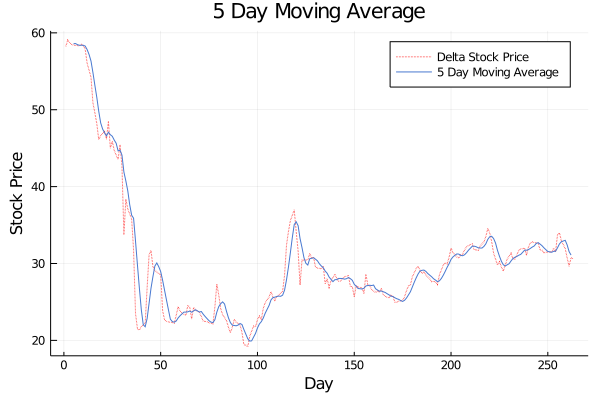

In [69]:
#y1 = y.*p_s .+ p_m
#p1 = p.*p_s .+ p_m
plot(collect(1:1:263),delta.Price.*p_s.+ p_m, linestyle = :dot, c =:red, label = "Delta Stock Price" )
plot!(collect(5:1:262),d.ma.*p_s.+ p_m, label = "5 Day Moving Average", linestyle =:solid, c =:seaborn_muted)
xlabel!("Day")
ylabel!("Stock Price")
title!("5 Day Moving Average")

In [14]:
d = delta[6:end,:]
d["ma"] = ma[1:end-1];
d

,Column1,TotalSentimentScore,Vaccine,Death,Shut,Spread,Death_Count_Day
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,5,-2.11694,-0.88069,-1.30332,-0.826446,-1.09711,-1.44969
2,6,-1.98968,-0.632435,-1.30332,-1.14515,-1.09711,-1.44969
3,7,0.203768,-0.88069,-0.895014,-1.14515,-0.709807,-1.44969
4,8,-1.33811,-0.88069,-1.30332,-1.14515,-0.709807,-1.44969
5,9,0.456761,-0.88069,-1.09917,-1.14515,-0.322506,-1.44969
6,10,-1.70185,-0.88069,-1.30332,-1.14515,-1.09711,-1.44969
7,11,0.373114,-0.135926,-1.09917,-0.826446,-1.09711,-1.44969
8,12,0.868927,-0.88069,-1.30332,-1.14515,-1.09711,-1.44969
9,13,-2.38117,-0.632435,-1.09917,-1.14515,-1.09711,-1.44969


In [24]:
function abs_err(y,pred)   # absolute error
    return mean(abs.(y-pred)) #mean(abs.((y-pred)./y))#return mean(abs.(y-pred))
end

abs_err (generic function with 1 method)

In [132]:
function select_best_model3(stock)
    # index for 5-fold
    split = [43-5,43-5 + 44,43+ 44*2-5,43 + 44*3-5, 43 + 44*4-5,43 + 44*5-5]
    num_of_model = 3
    mse = zeros(num_of_model,5)
    w = zeros(30)
    λ = .1
    for i in 1:5
        w_set = []
        # setting train and validation set
        split_cur = split[i]
        split2 = Int(round(split_cur*4/5))
        
        
        stock_train = stock[11][1:split2]
        stock_train1 = stock[10][1:split2]
        stock_val = stock[11][split2 + 1:split_cur]
        stock_val1 = stock[10][split2 + 1:split_cur]
        
        sent_train = stock[2][1:split2]
        sent_val = stock[2][split2 + 1:split_cur]
        
        trav_train = stock[9][1:split2] #travelling
        trav_val = stock[9][split2 + 1:split_cur]
        
        death_train = stock[4][1:split2]
        death_val = stock[4][split2 + 1:split_cur]
        
        vac_train = stock[3][1:split2]
        vac_val = stock[3][split2 + 1:split_cur]
        
        shut_train = stock[5][1:split2]
        shut_val = stock[5][split2 + 1:split_cur]
        
        spread_train = stock[6][1:split2]
        spread_val = stock[6][split2 + 1:split_cur]
        
        death_day_train = stock[7][1:split2]
        death_day_val = stock[7][split2 + 1:split_cur]
        
        pos_day_train =stock[8][1:split2]
        pos_day_val = stock[8][split2 + 1:split_cur]
        
        #Naive Model, w[1:9]
        loss = (1/length(spread_train))*QuadLoss()
        reg = λ*QuadReg()
        Xtrain = [sent_train stock_train trav_train death_train vac_train shut_train spread_train death_day_train pos_day_train ones(length(sent_train))]
        Xval = [sent_val stock_val trav_val death_val vac_val shut_val spread_val death_day_val pos_day_val ones(length(sent_val))]
        Ytrain = stock_train1
        Yval = stock_val1

        w_cur = proxgrad(loss,reg,Xtrain,Ytrain) #Xtrain\Ytrain
        #w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[1,i] = abs_err(Yval,pred)

        #AR1 Model, w[10:20]
        loss = (1/length(spread_train))*QuantileLoss(quantile = .6)#HuberLoss()#QuadLoss()
        reg = λ*QuadReg()
        Xtrain = [sent_train stock_train trav_train death_train vac_train shut_train spread_train death_day_train pos_day_train ones(length(sent_train))]
        Xval = [sent_val stock_val trav_val death_val vac_val shut_val spread_val death_day_val pos_day_val ones(length(sent_val))]
        Ytrain = stock_train1
        Yval = stock_val1

        w_cur = proxgrad(loss,reg,Xtrain,Ytrain) #Xtrain\Ytrain
        #w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[2,i] = abs_err(Yval,pred)

        # AR2 Model, w[20:30]
        loss = (1/length(spread_train))*HuberLoss()
        reg = λ*QuadReg()
        Xtrain = [sent_train stock_train trav_train death_train vac_train shut_train spread_train death_day_train pos_day_train ones(length(sent_train))]
        Xval = [sent_val stock_val trav_val death_val vac_val shut_val spread_val death_day_val pos_day_val ones(length(sent_val))]
        Ytrain = stock_train1
        Yval = stock_val1

        w_cur = proxgrad(loss,reg,Xtrain,Ytrain) #Xtrain\Ytrain
        #w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[3,i] = abs_err(Yval,pred)
        #w = hcat(w,w_set)
    end
    #w = w[:,2:6]
    avg_mse = mean(mse, dims=2)
    
    final_model = findmin(avg_mse)[2][1]
    test_mse = zeros(5)
    model = ["model 1", "model 2", "model 3"]
    model_length = [5, 6, 7]
    fig = plot(linestyle = :dot, title = "Test predictions from 9/17 to 10/30")
    w_test = zeros(model_length[final_model])
    for i in 1:5
    #Fixed index
        stock_train = stock[11][1:split[i]]
        stock_train1 = stock[10][1:split[i]]
        sent_train = stock[2][1:split[i]]
        trav_train = stock[9][1:split[i]]
        death_train = stock[4][1:split[i]]
        vac_train = stock[3][1:split[i]]
        shut_train = stock[5][1:split[i]]
        spread_train=stock[6][1:split[i]]
        death_day_train=stock[7][1:split[i]]
        pos_day_train = stock[8][1:split[i]]

        stock_test = stock[11][split[i]+1:split[i+1]]
        stock_test1 = stock[10][split[i]+1:split[i+1]]
        sent_test = stock[2][split[i]+1:split[i+1]]
        trav_test = stock[9][split[i]+1:split[i+1]]
        death_test = stock[4][split[i]+1:split[i+1]]
        vac_test = stock[3][split[i]+1:split[i+1]]
        shut_test = stock[5][split[i]+1:split[i+1]]
        spread_test=stock[6][split[i]+1:split[i+1]]
        death_day_test=stock[7][split[i]+1:split[i+1]]
        pos_day_test = stock[8][split[i]+1:split[i+1]]
        
        
        if final_model == 1
            reg = λ*QuadReg()
            loss = 1/length(stock_train)*QuadLoss()

            Xtrain = [sent_train stock_train trav_train death_train vac_train shut_train spread_train death_day_train pos_day_train ones(length(sent_train))]
            Xtest = [sent_test stock_test trav_test death_test vac_test shut_test spread_test death_day_test pos_day_test ones(length(sent_test))]
            Ytrain = stock_train1
            Ytest = stock_test1

            w_cur = proxgrad(loss,reg,Xtrain,Ytrain) #Xtrain\Ytrain
            #w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            #plot
            if i == 5
                println("q q")
                println("estimated error is: ",mean(test_mse), ", Validation Error is :", findmin(avg_mse)[1])
                print(w_cur)
                return Ytest,pred,w_cur
            end

        elseif final_model == 2
            loss = (1/length(stock_train))*QuantileLoss(quantile = .6)#HuberLoss()#QuadLoss()
            reg = λ*QuadReg()
            Xtrain = [sent_train stock_train trav_train death_train vac_train shut_train spread_train death_day_train pos_day_train ones(length(sent_train))]
            Xtest = [sent_test stock_test trav_test death_test vac_test shut_test spread_test death_day_test pos_day_test ones(length(sent_test))]
            Ytrain = stock_train1
            Ytest = stock_test1

            w_cur = proxgrad(loss,reg,Xtrain,Ytrain) #Xtrain\Ytrain
            #w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            #plot
            if i == 5
                #println("DL")
                println("estimated error is: ",mean(test_mse), ", Validation Error is :", findmin(avg_mse)[1])
                println("quantile quad")
                print(w_cur)
                return Ytest,pred,w_cur
            end

        elseif final_model == 3
            loss = (1/length(stock_train))*HuberLoss()
            reg = λ*QuadReg()
            Xtrain = [sent_train stock_train trav_train death_train vac_train shut_train spread_train death_day_train pos_day_train ones(length(sent_train))]
            Xtest = [sent_test stock_test trav_test death_test vac_test shut_test spread_test death_day_test pos_day_test ones(length(sent_test))]
            Ytrain = stock_train1
            Ytest = stock_test1

            w_cur = proxgrad(loss,reg,Xtrain,Ytrain) #Xtrain\Ytrain
            #w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred) 
            #plot
            if i == 5
                println("huber quadr")
                println("estimated error is: ",mean(test_mse), ", Validation Error is :", findmin(avg_mse)[1])
                print(w_cur)
                return Ytest,pred,w_cur
            end
        else
            print("error")
        end  
    end
    #w_test = w_test[:,2:6]
    print("Selected: ", model[final_model], ", estimated error is: ",mean(test_mse), ", Validation Error is :", findmin(avg_mse)[1])
end

select_best_model3 (generic function with 1 method)

q q
estimated error is: 0.20686456679036863, Validation Error is :0.32929515507632556
[-0.026830986867106936, 0.7448472318972432, -0.06327482672756866, -0.05198734012551708, 0.00025790460893686284, -0.03720520201147996, -0.06811216818670818, -0.04087878291122517, 0.03533535193734377, -0.02684333830558097]

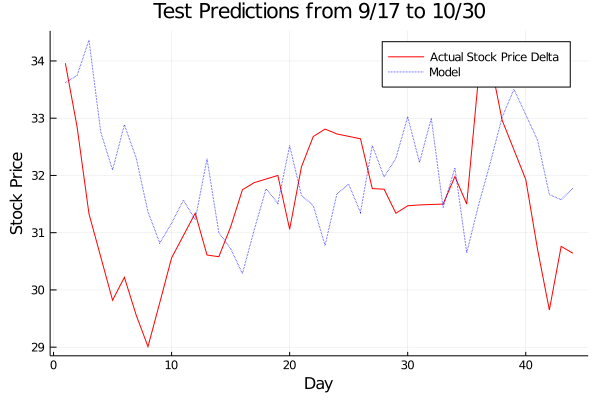

In [133]:
y,p,w1 = select_best_model3(d)
y1 = y.*p_s .+ p_m
p1 = p.*p_s .+ p_m

date = collect(1:1:44)
plot(date, y1, color = :red, label = "Actual Stock Price Delta")
plot!(date, p1, color = :blue, linestyle = :dot,label = "Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

q q
estimated error is: 0.22244366069670876, Validation Error is :0.270019921137432
[-0.03313246139042198, 0.7427149851240572, -0.06148215869598853, -0.019240623601046378, 0.008709339709963274, -0.034470929904521455, -0.0829146251227287, 0.026439765999039883, 0.0275224182946036, -0.023508578162329374]

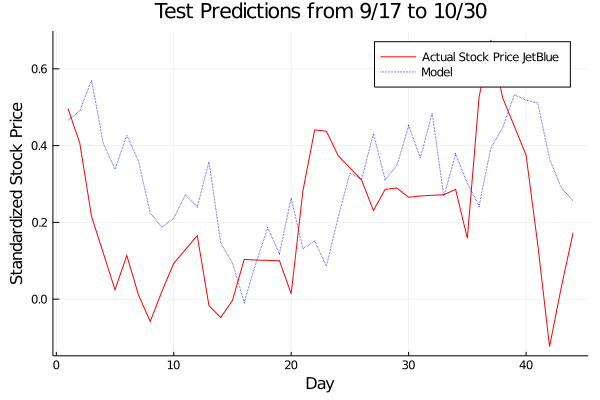

In [121]:
jb = CSV.read("jetblue2.csv");
ta = TimeArray(dates, jb.Price);
ma_p = moving(mean,ta,5);
ma = values(ma_p);
m = append!([0.0],ma)
m = m[1:end-1]
j = jb[6:end,:]
j["ma"] = ma[1:end-1];
y,p,w2 = select_best_model3(j)
date = collect(1:1:44)
plot(date, y, color = :red, label = "Actual Stock Price JetBlue")
plot!(date, p, color = :blue, linestyle = :dot,label = "Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Standardized Stock Price")

q q
estimated error is: 0.20559801924347126, Validation Error is :0.2767910602429847
[-0.02108316501512152, 0.7539100376103722, -0.05237572397012235, -0.03208511618454435, 0.0006259823934605293, -0.03922822167721096, -0.06267681260370538, -0.016198140835719625, 0.0174702583177401, -0.026392702897260416]

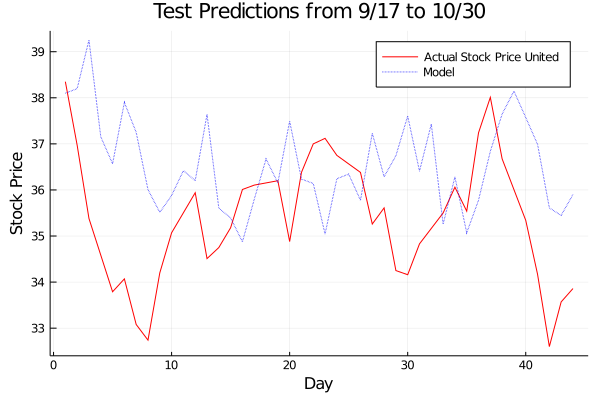

In [135]:
un = CSV.read("united2.csv");
ta = TimeArray(dates, un.Price);
ma_p = moving(mean,ta,5);
ma = values(ma_p);
m = append!([0.0],ma)
m = m[1:end-1]
u = un[6:end,:]
u["ma"] = ma[1:end-1];

y,p,w3 = select_best_model3(u)
u_orig = CSV.read("united.csv");
p_m1 = mean(u_orig.Price)
p_s1 = std(u_orig.Price)
date = collect(1:1:44)
plot(date, y.*p_s1.+p_m1, color = :red, label = "Actual Stock Price United")
plot!(date, p.*p_s1.+p_m1, color = :blue, linestyle = :dot,label = "Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

q q
estimated error is: 0.2525119388294047, Validation Error is :0.29159251592597774
[-0.030125702426150973, 0.7561204029918026, -0.06624513485366182, -0.05016068354294415, -0.004717720163763196, -0.019657517578904545, -0.047428343509692335, -0.03050143374394476, 0.07292301181437212, -0.02504613159174915]

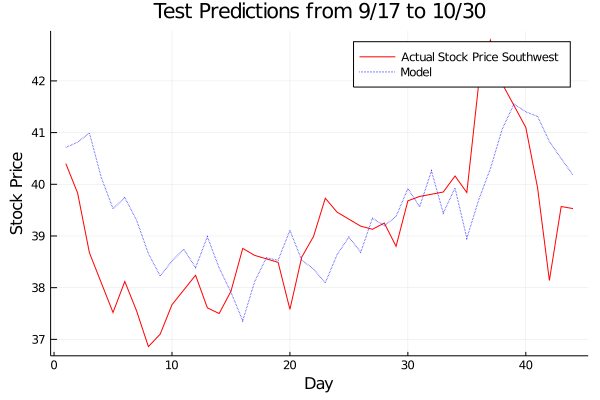

In [123]:
sw = CSV.read("southwest2.csv");
ta = TimeArray(dates, sw.Price);
ma_p = moving(mean,ta,5);
ma = values(ma_p);
m = append!([0.0],ma)
m = m[1:end-1]
sw = sw[6:end,:]
sw["ma"] = ma[1:end-1];

sw_orig = CSV.read("southwest.csv");
p_m1 = mean(sw_orig.Price)
p_s1 = std(sw_orig.Price)
y,p,w4 = select_best_model3(sw)
date = collect(1:1:44)
plot(date, y.*p_s1.+p_m1, color = :red, label = "Actual Stock Price Southwest")
plot!(date, p.*p_s1.+p_m1, color = :blue, linestyle = :dot,label = "Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

q q
estimated error is: 0.22843712159685006, Validation Error is :0.29834688392777386
[-0.03253066365536377, 0.7473260286724094, -0.032374478584977454, -0.017546131172885674, -0.003568918031417914, -0.008774516763015088, -0.06035581319767641, 0.00420022674654764, -8.443814312375714e-5, -0.03158616762167277]

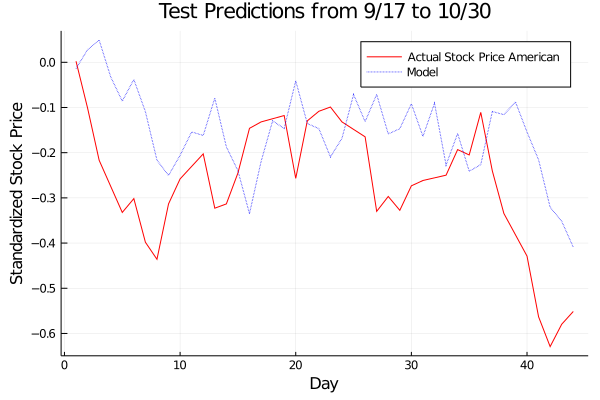

In [124]:
sw = CSV.read("american2.csv");
ta = TimeArray(dates, sw.Price);
ma_p = moving(mean,ta,5);
ma = values(ma_p);
m = append!([0.0],ma)
m = m[1:end-1]
sw = sw[6:end,:]
sw["ma"] = ma[1:end-1];

y,p,w5 = select_best_model3(sw)
date = collect(1:1:44)
plot(date, y, color = :red, label = "Actual Stock Price American")
plot!(date, p, color = :blue, linestyle = :dot,label = "Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Standardized Stock Price")

huber quadr
estimated error is: 0.2224214630835148, Validation Error is :0.27653973228958745
[-0.030295618639380215, 0.6615918495911626, -0.049627088990753986, -0.04083489452099061, 4.128919076420361e-5, -0.056037928153190524, -0.0754804598395892, -0.007713928667497499, 0.016698328698421312, -0.02414513829722951]

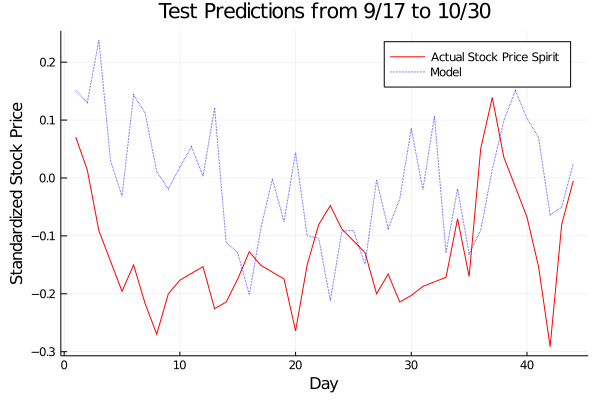

In [125]:
sw = CSV.read("spirit2.csv");
ta = TimeArray(dates, sw.Price);
ma_p = moving(mean,ta,5);
ma = values(ma_p);
m = append!([0.0],ma)
m = m[1:end-1]
sw = sw[6:end,:]
sw["ma"] = ma[1:end-1];

y,p,w6 = select_best_model3(sw)
date = collect(1:1:44)
plot(date, y, color = :red, label = "Actual Stock Price Spirit")
plot!(date, p, color = :blue, linestyle = :dot,label = "Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Standardized Stock Price")

estimated error is: 0.2626223786540774, Validation Error is :0.34997215033499
quantile quad
[-0.023754280102772328, 0.6073542255989863, -0.07839317255532072, -0.06807273035128743, -0.02590888657071102, -0.0781403801194018, -0.06974017791379572, -0.008661712635390388, 0.013020206815578007, 0.013243283630832648]

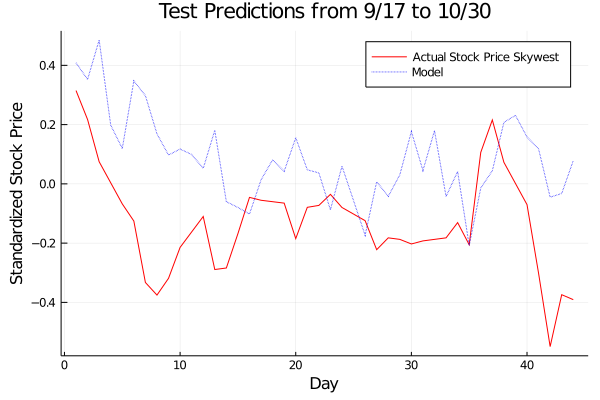

In [126]:
sw = CSV.read("skywest2.csv");
ta = TimeArray(dates, sw.Price);
ma_p = moving(mean,ta,5);
ma = values(ma_p);
m = append!([0.0],ma)
m = m[1:end-1]
sw = sw[6:end,:]
sw["ma"] = ma[1:end-1];

y,p,w7 = select_best_model3(sw)
date = collect(1:1:44)
plot(date, y, color = :red, label = "Actual Stock Price Skywest")
plot!(date, p, color = :blue, linestyle = :dot,label = "Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Standardized Stock Price")

q q
estimated error is: 0.24286860468166313, Validation Error is :0.3032247580907729
[-0.03500913553985138, 0.7181596136422564, -0.06338936579553049, -0.03073507173861906, 0.011020496245855315, -0.049540985305174555, -0.07994213256612939, 0.04753643464844989, -0.05839881583648564, -0.027081732770303808]

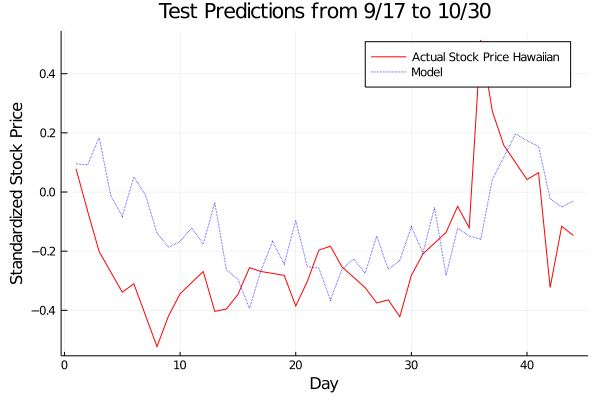

In [127]:
sw = CSV.read("hawaiian2.csv");
ta = TimeArray(dates, sw.Price);
ma_p = moving(mean,ta,5);
ma = values(ma_p);
m = append!([0.0],ma)
m = m[1:end-1]
sw = sw[6:end,:]
sw["ma"] = ma[1:end-1];

y,p,w8 = select_best_model3(sw)
date = collect(1:1:44)
plot(date, y, color = :red, label = "Actual Stock Price Hawaiian")
plot!(date, p, color = :blue, linestyle = :dot,label = "Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Standardized Stock Price")

q q
estimated error is: 0.2502391768290059, Validation Error is :0.31585068054696486
[-0.033137187286331235, 0.6682220178383685, -0.06336075394054466, -0.035934973294219796, 0.02443508983898293, -0.08960738864580278, -0.050017747750371426, -0.08148841284372997, -0.02859042622836091, -0.03658870218482482]

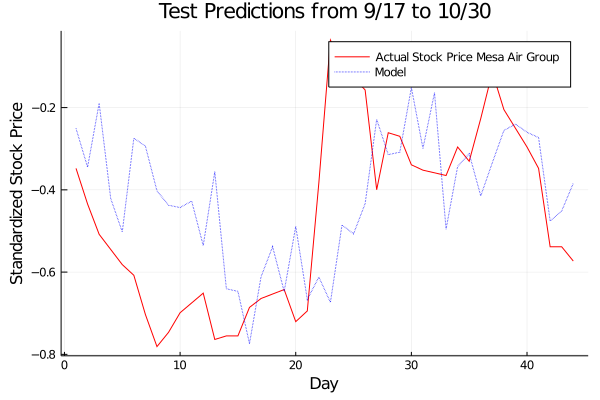

In [128]:
sw = CSV.read("mesa2.csv");
ta = TimeArray(dates, sw.Price);
ma_p = moving(mean,ta,5);
ma = values(ma_p);
m = append!([0.0],ma)
m = m[1:end-1]
sw = sw[6:end,:]
sw["ma"] = ma[1:end-1];

y,p,w9 = select_best_model3(sw)
date = collect(1:1:44)
plot(date, y, color = :red, label = "Actual Stock Price Mesa Air Group")
plot!(date, p, color = :blue, linestyle = :dot,label = "Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Standardized Stock Price")

q q
estimated error is: 0.23122635068300146, Validation Error is :0.2733588334442051
[-0.04053503979972633, 0.7369680987907894, -0.06478642560865976, -0.038615238786323156, 0.010692945902768003, -0.046920049588602686, -0.07866166535859058, 0.030797592744816357, 0.03101961605088059, -0.010869387345743067]

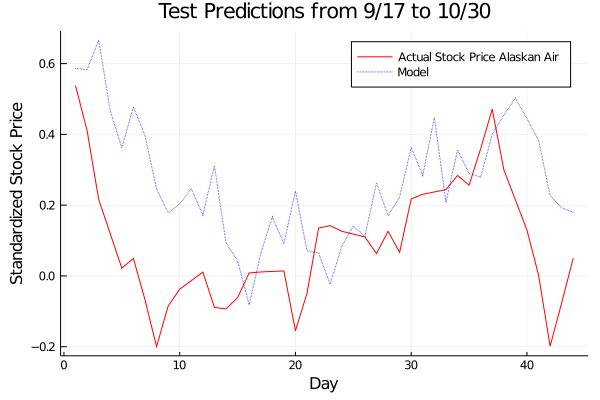

In [129]:
sw = CSV.read("alaska2.csv");
ta = TimeArray(dates, sw.Price);
ma_p = moving(mean,ta,5);
ma = values(ma_p);
m = append!([0.0],ma)
m = m[1:end-1]
sw = sw[6:end,:]
sw["ma"] = ma[1:end-1];

y,p,w10 = select_best_model3(sw)
date = collect(1:1:44)
plot(date, y, color = :red, label = "Actual Stock Price Alaskan Air")#, legend=:bottomright)
plot!(date, p, color = :blue, linestyle = :dot,label = "Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Standardized Stock Price")